<a href="https://colab.research.google.com/github/jamesnatoli/ABCD_Exercise_HTT/blob/main/GradientAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradiant Analysis of Neural Network Variables
This applies a technique developed by KIT researchers and described in a [2018 paper](https://arxiv.org/pdf/1803.08782.pdf).

First, we load relevant modules

In [21]:
# Importing usual python packages
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

#%%capture output
# Importing ML related packages.
import tensorflow
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
!pip install np_utils

# check the tensorflow version we are using. Should be 2.2.0, but 2.15.0 is ok (i think)
print(tensorflow.__file__)
print(tensorflow.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56439 sha256=602aad3324b2fd67c17230edf6cfaa997f3e2fd10f4c905ce5ae64df8524d5de
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils
/usr/local/lib/python3.10/dist-packages/tensorflow/__init__.py
2.15.0


Let's define functions to train our network and make some plots. This is actually superfluous, because Google Colab doesn't provide enough RAM to train a network here so we have to laod it in. But leaving this here for reference...

In [22]:
def train(training_data, training_labels):
  nvars = len(training_labels)

  # Define the model
  model = Sequential()
  model.add(Dense(nvars*2, input_shape=(nvars,), name='input', activation='relu'))
  # model.add(Dropout(0.1))
  model.add(Dense(nvars, name='hidden', activation='relu', kernel_initializer='normal'))
  model.add(Dense(1, name='output', activation='sigmoid', kernel_initializer='normal'))
  model.summary()
  model.compile(optimizer='adam', loss='binary_crossentropy',
                metrics=['accuracy'])

  # Print summary of the model
  model.summary()

  # train that there model
  history = model.fit(training_data, training_labels, shuffle=True,
                      epochs=20, batch_size=1024, verbose=False,
                      validation_split=0.25, sample_weight=training_weights
                      )

  # Save model to file
  model.save('model.hd5')

  return history

def plot(history):
  # Get training and validation loss/accuracy values from history
  loss_training = history.history['loss']
  loss_validation = history.history['val_loss']
  accuracy_training = history.history['acc']
  accuracy_validation = history.history['val_acc']

  # Plot the training and validation loss/accuracy vs the number of epochs
  plt.plot(accuracy_training, label="Acc")
  plt.plot(accuracy_validation, label="Validation Acc")
  plt.legend()
  plt.savefig('loss_vs_epochs.png')

  return

These will be our training variables, but we can add/remove as we please

In [23]:
training_variables = [
  "PionTriplet_pt_Full", "PionTriplet_pt_Track",
  "PionTriplet_eta_Full", "PionTriplet_eta_Track",
  "PionTriplet_phi_Full", "PionTriplet_phi_Track",
  # "PionTriplet_MassInv_Full", "PionTriplet_MassInv_Track",
  "PionTriplet_MassInv_12_Full", "PionTriplet_MassInv_23_Full", "PionTriplet_MassInv_13_Full",
  "PionTriplet_MassInv_12_Track", "PionTriplet_MassInv_23_Track", "PionTriplet_MassInv_13_Track",
  "PionTriplet_MassInv_l1met_Full", "PionTriplet_MassInv_l2met_Full", "PionTriplet_MassInv_l3met_Full",
  "PionTriplet_MassInv_l1met_Track", "PionTriplet_MassInv_l2met_Track", "PionTriplet_MassInv_l3met_Track",
  "PionTriplet_dR_12_Full", "PionTriplet_dR_13_Full", "PionTriplet_dR_23_Full",
  "PionTriplet_dR_12_Track", "PionTriplet_dR_13_Track", "PionTriplet_dR_23_Track",
  "PionTriplet_deta_12_Full", "PionTriplet_deta_13_Full", "PionTriplet_deta_23_Full",
  "PionTriplet_deta_12_Track", "PionTriplet_deta_13_Track", "PionTriplet_deta_23_Track",
  "PionTriplet_dphi_12_Full", "PionTriplet_dphi_13_Full", "PionTriplet_dphi_23_Full",
  "PionTriplet_dphi_12_Track", "PionTriplet_dphi_13_Track", "PionTriplet_dphi_23_Track",
  "PionTriplet_pion1_dxy", "PionTriplet_pion2_dxy", "PionTriplet_pion3_dxy",
  "PionTriplet_pion1_dz", "PionTriplet_pion2_dz", "PionTriplet_pion3_dz",
  "PionTriplet_pion1_pt_Full", "PionTriplet_pion2_pt_Full", "PionTriplet_pion3_pt_Full",
  "PionTriplet_pion1_pt_Track", "PionTriplet_pion2_pt_Track", "PionTriplet_pion3_pt_Track",
  "PionTriplet_pion1_eta_Full", "PionTriplet_pion2_eta_Full", "PionTriplet_pion3_eta_Full",
  "PionTriplet_pion1_eta_Track", "PionTriplet_pion2_eta_Track", "PionTriplet_pion3_eta_Track",
  "PionTriplet_pion1_phi_Full", "PionTriplet_pion2_phi_Full", "PionTriplet_pion3_phi_Full",
  "PionTriplet_pion1_phi_Track", "PionTriplet_pion2_phi_Track", "PionTriplet_pion3_phi_Track",
  "PionTriplet_pion3_iso",
]

Now we load the load our dataset and model. Training the model here crashes the runtime due to insufficient RAM, so we'll need to do the training somewhere else. A fully trained network and dataset are in the [Git Repo](https://github.com/jamesnatoli/GradiantAnalysisNN), so we'll clone it here

In [24]:
# clone repository only  if necessary
import os
if os.path.isdir('GradiantAnalysisNN') or os.path.isfile('training_processes.csv'):
  print("Repository already exists!")
  if os.path.isdir('GradiantAnalysisNN'):
    %cd GradiantAnalysisNN
    !pwd
else:
  !git clone https://github.com/jamesnatoli/GradiantAnalysisNN.git

!ls

Repository already exists!
events.data		  Exercise-Solution.ipynb	   training_processes.csv
Exercise_Completed.ipynb  README.md
Exercise.ipynb		  testModel_v5p2_discMassInv.hdf5


Now we can load the dataset file and the trained model

In [25]:
# we will use this to split up our data
from sklearn.model_selection import train_test_split
# need this to load the model
from keras.models import load_model

# load data
inputdata = pd.read_csv('training_processes.csv')

# load model
modelname = 'testModel_v5p2_discMassInv.hdf5' # we'll use it later
model = load_model(modelname)

# Make this explicit
training_dataframe = inputdata[training_variables + ['isSignal', 'evtwt']]

# big function that returns basically everything that we need
# this is different than the example, as these training/testing containers are not masks, but already contain the values
training_data, testing_data, training_labels, testing_labels, training_weights, _  = train_test_split(
        training_dataframe[training_variables].values, training_dataframe['isSignal'].values, training_dataframe['evtwt'].values,
        test_size=0.05, random_state=7
    )

labels = np.append(training_labels, [i+2 for i in testing_labels])
data = np.concatenate([training_data, testing_data])

# create "masks" here, this is a little silly but allows us to directly use the example code
bckgrd = labels==0
signal = labels==1
training_set = labels<2
bckgrd_test = labels==2
signal_test = labels==3
test_set = labels>=2

# history = train( training_data, training_labels)
# plot(history)


Let's do a quick check here to see how well the trained model was able to separate the signal and background

In [26]:
def apply(events, model):
    # Pass events through model
    predictions = model.predict(events)
    return predictions

643/643 [==============================] - 1s 2ms/step


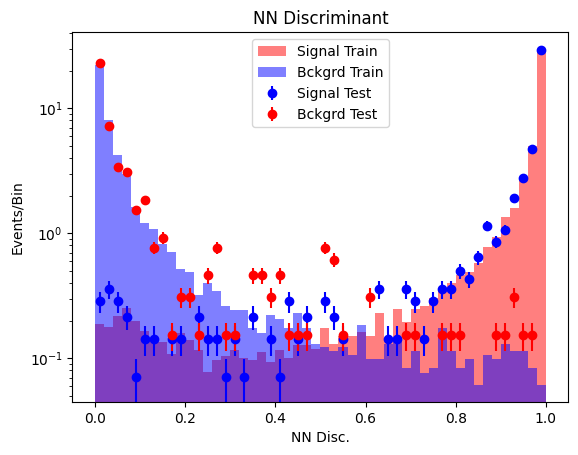

In [27]:
#training_predictions = apply(training_data, model)
#testing_predictions = apply(testing_data, model)
#predictions = np.append(training_predictions, testing_predictions)

predictions = apply(data, model).flatten()

# Get the bins
counts_signal_test, bins, _ = plt.hist(predictions[signal_test], bins=50, range=(0, 1), density=True)
counts_bckgrd_test, bins, _ = plt.hist(predictions[bckgrd_test], bins=50, range=(0, 1), density=True)
bin_centers = 0.5*(bins[1:] + bins[:-1])
plt.clf()

# Now plot the histograms
plt.hist(predictions[signal], histtype='stepfilled', color='red', label='Signal Train', bins=50, range=(0,1), density=True, alpha=0.5)
plt.hist(predictions[bckgrd], histtype='stepfilled', color='blue', label='Bckgrd Train', bins=50, range=(0,1), density=True, alpha=0.5)

# Plot the points with error bars
plt.errorbar( bin_centers, counts_signal_test, yerr=np.sqrt(counts_signal_test)*.1, fmt='o', color='blue', label='Signal Test')
plt.errorbar( bin_centers, counts_bckgrd_test, yerr=np.sqrt(counts_bckgrd_test)*.1, fmt='o', color='red', label='Bckgrd Test')

# Beautify
plt.title('NN Discriminant')
plt.xlabel('NN Disc.')
plt.ylabel('Events/Bin')
plt.yscale('log')
plt.legend()

Now that we have our data and our fully trained model, let's start to analyze the variables. First, define a function to extract the gradients from the model

In [28]:
def get_gradients(sample, model):
  with tensorflow.GradientTape() as tape: #https://www.tensorflow.org/guide/advanced_autodiff#higher-order_gradients
      inputs = tensorflow.Variable([sample])
      tape.watch(inputs)
      output = model(inputs)
  g = tape.gradient(output, inputs)
  grads = g.numpy()[0]
  return grads

In [29]:
mean_grads = [0.0 for i in range(len(training_variables))]
n_evts = len(testing_data)
print(f'# testing events: {n_evts}')
fraction = 10 # run only every nth event for saving time
for n, sample in enumerate(testing_data):
  if n%fraction!=0:
      continue
  grads = get_gradients(sample, model)
  for i in range(len(mean_grads)):
      mean_grads[i] += abs(grads[i])/n_evts*fraction
print(mean_grads)

# testing events: 1028
[0.026698546637191196, 0.044527894592134354, 0.009756691191231336, 0.016163780342936196, 0.006844860736237023, 0.008667218327293709, 0.05968140043711912, 0.011822512963869845, 0.013840206534448474, 0.028026120845223178, 0.05475121734776154, 0.03440190873971359, 0.022551781974201983, 0.043166875341453144, 0.008454046296254169, 0.014848878061196965, 0.045726022970073825, 0.014306327940925201, 0.016897386103947868, 0.015305697447070351, 0.005822197432914863, 0.019805039883421256, 0.007538395718271251, 0.00716082300745529, 0.015113257915396769, 0.01237191399264943, 0.015637907895041925, 0.0227706748866291, 0.014800834790279875, 0.014629329692199483, 0.004935120761316916, 0.006374449442752533, 0.007674708765247354, 0.007320684330590371, 0.014044916091493546, 0.012397945129132252, 0.008855202198983957, 0.007380067534236667, 0.02245789791242417, 0.00984943279776601, 0.007922631224545397, 0.00831891708614584, 0.06468610442174154, 0.07359514482394836, 0.03585055609483941,

These gradiants essentially tell us how important each variable is to the training! In the example we had only 3 dummy variables, so let's map these to the list of variable names and print the 10 largest

In [30]:
variables_and_gradiants = {}
for grad, var in zip(mean_grads, training_variables):
  variables_and_gradiants[var] = grad

# sort the gradiants, keeping track of which variable they correspond to
inOrder = dict(sorted(variables_and_gradiants.items(), key=lambda item: item[1]))

vars = list(inOrder.keys())
grads = list(inOrder.values())

# Careful here...
topCorrIndices = [ training_variables.index(i) for i in reversed(vars)]
botCorrIndices = [ training_variables.index(i) for i in vars]
corrIndices = [ training_variables.index(i) for i in vars]

print('The 10 MOST correllated...')
for i in range(1, 11):
  print(f'{vars[-i]:<35}: {grads[-i]}')

print('\nThe 10 LEAST correllated...')
for i in range(10):
  print(f'{vars[i]:<35}: {grads[i]}')


The 10 MOST correllated...
PionTriplet_pion2_pt_Track         : 0.11160456205384488
PionTriplet_pion3_iso              : 0.08993975603332424
PionTriplet_pion2_pt_Full          : 0.07359514482394836
PionTriplet_pion1_pt_Full          : 0.06468610442174154
PionTriplet_pion1_pt_Track         : 0.06106534305260261
PionTriplet_MassInv_12_Full        : 0.05968140043711912
PionTriplet_MassInv_23_Track       : 0.05475121734776154
PionTriplet_MassInv_l2met_Track    : 0.045726022970073825
PionTriplet_pt_Track               : 0.044527894592134354
PionTriplet_MassInv_l2met_Full     : 0.043166875341453144

The 10 LEAST correllated...
PionTriplet_pion3_phi_Track        : 0.004357716405219001
PionTriplet_pion2_eta_Full         : 0.004812491419906882
PionTriplet_pion2_phi_Track        : 0.004918203315594294
PionTriplet_dphi_12_Full           : 0.004935120761316916
PionTriplet_pion3_eta_Full         : 0.005649968963786532
PionTriplet_dR_23_Full             : 0.005822197432914863
PionTriplet_dphi_13_Ful

Now that we have the gradiants for each variable, let's make some plots

In [31]:
def createVarMatrix( nvar, indices):
  nvar = 5
  f, axarr = plt.subplots(nvar, nvar, figsize=[12.8, 9.6])
  nbins = 50
  for i in range(nvar):
    for j in range(nvar):
      if i==j:
        axarr[i,j].hist(data[signal_test,indices[i]], histtype=u'step', bins=nbins, range=(-4,4), label="signal")
        axarr[i,j].hist(data[bckgrd_test,indices[i]], histtype=u'step', bins=nbins, range=(-4,4), label="background")
        # axarr[i,j].legend()
        axarr[i,j].set_xlabel(training_variables[indices[i]])
        axarr[i,j].set_ylabel("# events")
      else:
        axarr[i,j].scatter(data[signal_test,indices[i]],data[signal_test,indices[j]], s=1, alpha=0.3, label="signal")
        axarr[i,j].scatter(data[bckgrd_test,indices[i]],data[bckgrd_test,indices[j]], s=1, alpha=0.3, label="background")
        # axarr[i,j].legend()
        axarr[i,j].set_ylabel(training_variables[indices[i]])
        axarr[i,j].set_xlabel(training_variables[indices[j]])

  plt.tight_layout()
  plt.show()

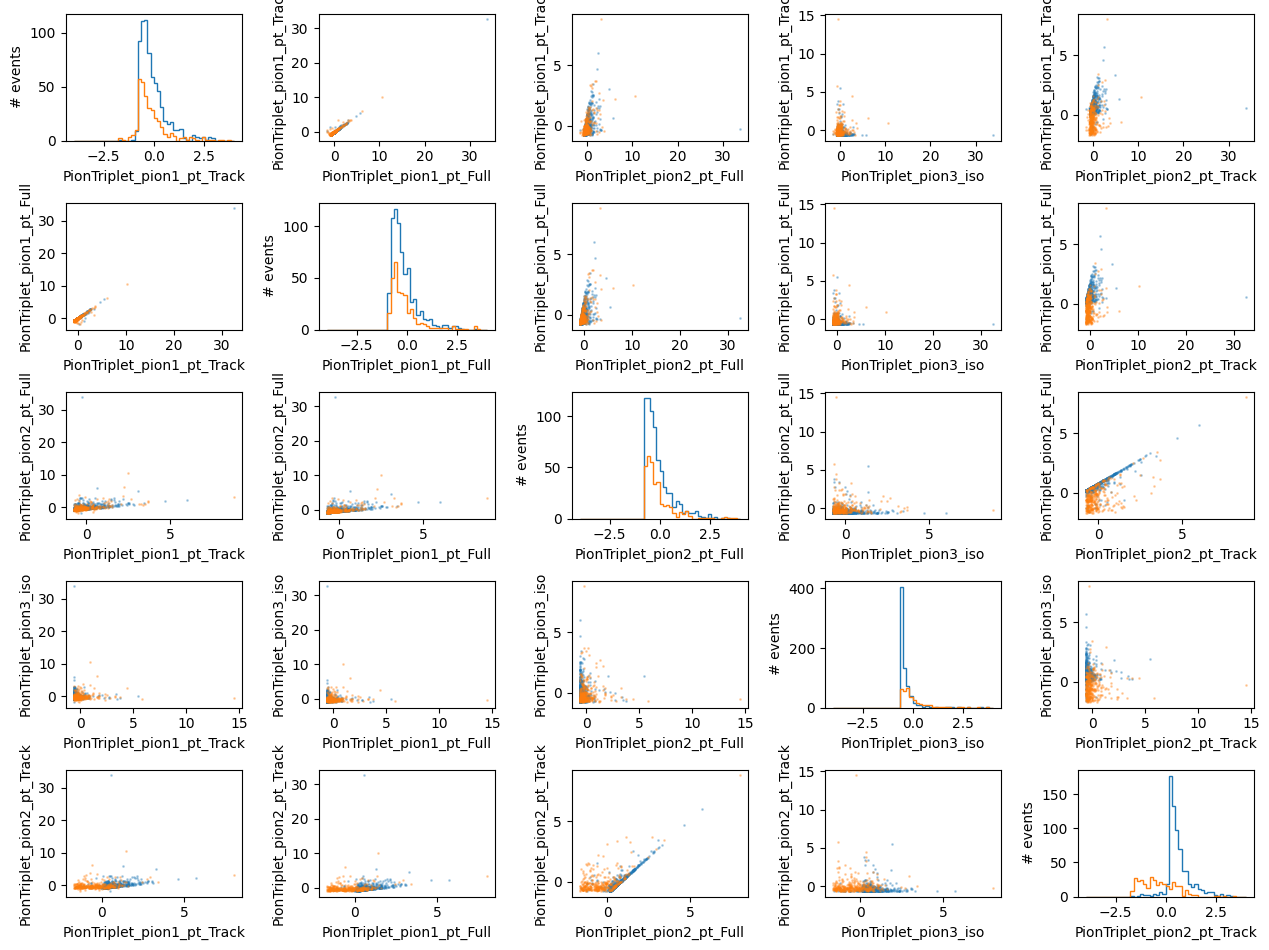

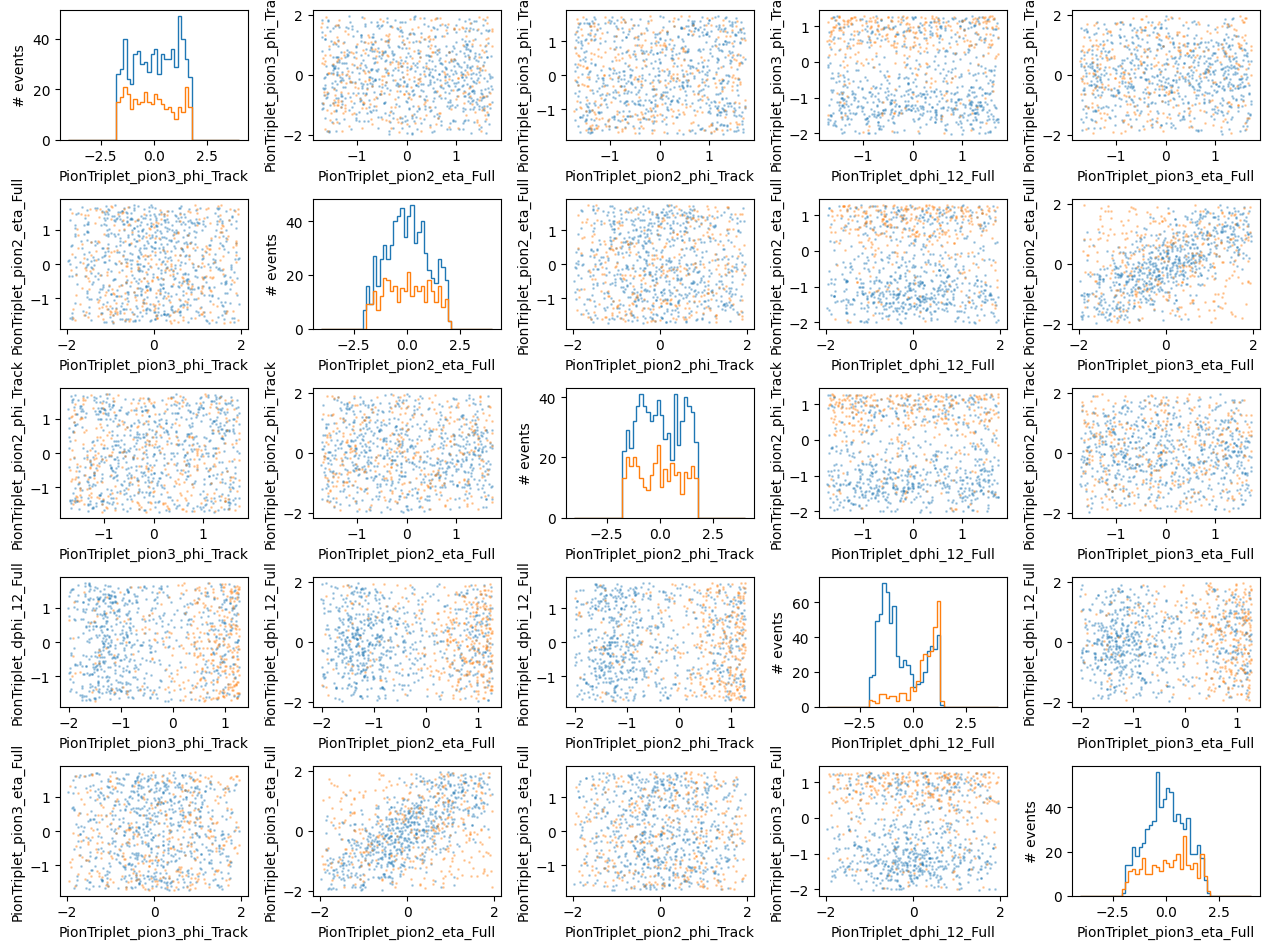

In [32]:
createVarMatrix(5, corrIndices[-5:])
print('\n\n')
createVarMatrix(5, corrIndices)